In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook

In [5]:
# Read the csv file into a pandas DataFrame

all_wells = pd.read_csv('Data/Original_Data.csv')
all_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   NPD_WELL_BORE_CODE        15634 non-null  int64  
 3   NPD_WELL_BORE_NAME        15634 non-null  object 
 4   NPD_FIELD_CODE            15634 non-null  int64  
 5   NPD_FIELD_NAME            15634 non-null  object 
 6   NPD_FACILITY_CODE         15634 non-null  int64  
 7   NPD_FACILITY_NAME         15634 non-null  object 
 8   ON_STREAM_HRS             15349 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

In [6]:
all_wells.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.38,...,%,33.1,10.48,33.07,0.0,0.0,0.0,NaN,production,OP


In [7]:
all_wells_df =all_wells[(all_wells['AVG_DOWNHOLE_PRESSURE'] !=0)]

In [8]:
all_wells_df.astype(bool).sum(axis=0)

DATEPRD                     13322
WELL_BORE_CODE              13322
NPD_WELL_BORE_CODE          13322
NPD_WELL_BORE_NAME          13322
NPD_FIELD_CODE              13322
NPD_FIELD_NAME              13322
NPD_FACILITY_CODE           13322
NPD_FACILITY_NAME           13322
ON_STREAM_HRS               11758
AVG_DOWNHOLE_PRESSURE       13322
AVG_DOWNHOLE_TEMPERATURE    13322
AVG_DP_TUBING               13322
AVG_ANNULUS_PRESS           12272
AVG_CHOKE_SIZE_P            13116
AVG_CHOKE_UOM               13322
AVG_WHP_P                   13227
AVG_WHT_P                   13234
DP_CHOKE_SIZE                7120
BORE_OIL_VOL                12558
BORE_GAS_VOL                12560
BORE_WAT_VOL                12186
BORE_WI_VOL                 13019
FLOW_KIND                   13322
WELL_TYPE                   13322
dtype: int64

In [9]:
all_wells_df =all_wells_df.drop(all_wells_df[(all_wells_df['BORE_OIL_VOL'] == 0) & (all_wells_df['BORE_GAS_VOL'] == 0.0) & (all_wells_df['BORE_WAT_VOL'] == 0)].index)

In [10]:
all_wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12560 entries, 15 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   12560 non-null  object 
 1   WELL_BORE_CODE            12560 non-null  object 
 2   NPD_WELL_BORE_CODE        12560 non-null  int64  
 3   NPD_WELL_BORE_NAME        12560 non-null  object 
 4   NPD_FIELD_CODE            12560 non-null  int64  
 5   NPD_FIELD_NAME            12560 non-null  object 
 6   NPD_FACILITY_CODE         12560 non-null  int64  
 7   NPD_FACILITY_NAME         12560 non-null  object 
 8   ON_STREAM_HRS             12275 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 11  AVG_DP_TUBING             5943 non-null   float64
 12  AVG_ANNULUS_PRESS         5156 non-null   float64
 13  AVG_CHOKE_SIZE_P          6087 non-null   float64
 14  AVG_C

In [11]:
all_wells_df=all_wells_df.dropna(subset =["AVG_DOWNHOLE_PRESSURE"])

In [12]:
all_wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   NPD_WELL_BORE_CODE        5943 non-null   int64  
 3   NPD_WELL_BORE_NAME        5943 non-null   object 
 4   NPD_FIELD_CODE            5943 non-null   int64  
 5   NPD_FIELD_NAME            5943 non-null   object 
 6   NPD_FACILITY_CODE         5943 non-null   int64  
 7   NPD_FACILITY_NAME         5943 non-null   object 
 8   ON_STREAM_HRS             5943 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 11  AVG_DP_TUBING             5943 non-null   float64
 12  AVG_ANNULUS_PRESS         5021 non-null   float64
 13  AVG_CHOKE_SIZE_P          5943 non-null   float64
 14  AVG_CHO

## Dropping columns

(Codes, Names, Hrs)

 2   NPD_WELL_BORE_CODE        5940 non-null   int64  
 
 3   NPD_WELL_BORE_NAME        5940 non-null   object
 
 4   NPD_FIELD_CODE            5940 non-null   int64  
 
 5   NPD_FIELD_NAME            5940 non-null   object 
 
 6   NPD_FACILITY_CODE         5940 non-null   int64  
 
 7   NPD_FACILITY_NAME         5940 non-null   object 
 
 8   ON_STREAM_HRS             5940 non-null   float64
 
 
 
 

In [13]:
df=all_wells_df.drop(all_wells_df.columns[2:9], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 4   AVG_DP_TUBING             5943 non-null   float64
 5   AVG_ANNULUS_PRESS         5021 non-null   float64
 6   AVG_CHOKE_SIZE_P          5943 non-null   float64
 7   AVG_CHOKE_UOM             5943 non-null   object 
 8   AVG_WHP_P                 5943 non-null   float64
 9   AVG_WHT_P                 5943 non-null   float64
 10  DP_CHOKE_SIZE             5943 non-null   float64
 11  BORE_OIL_VOL              5943 non-null   float64
 12  BORE_GAS_VOL              5943 non-null   float64
 13  BORE_WAT_VOL              5943 non-null   float64
 14  BORE_WI

Pressure difference between top and bottom of well

 4  AVG_DP_TUBING             5940 non-null   float64
 
 Its not measured on the surace
 
 5  AVG_ANNULUS_PRESS         5019 non-null   float64
 
 No Data
 
 14  BORE_WI_VOL               0 non-null      float64
 
Symbol

7   AVG_CHOKE_UOM 
 
 

In [14]:
# Date Column
df=df.drop(df.columns[0], axis =1)


In [15]:
df=df.drop(df.columns[3:5], axis =1)

In [16]:
df=df.drop(df.columns[4], axis =1)

In [17]:
df=df.drop(df.columns[10], axis =1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 603.6+ KB


In [19]:
df["WELL_BORE_CODE"].value_counts()

NO 15/9-F-14 H    2703
NO 15/9-F-11 H    1118
NO 15/9-F-12 H     925
NO 15/9-F-15 D     767
NO 15/9-F-1 C      430
Name: WELL_BORE_CODE, dtype: int64

In [43]:
df.astype(bool).sum(axis=0)

WELL_BORE_CODE              5937
AVG_DOWNHOLE_PRESSURE       5937
AVG_DOWNHOLE_TEMPERATURE    5937
AVG_CHOKE_SIZE_P            5937
AVG_WHP_P                   5937
AVG_WHT_P                   5937
DP_CHOKE_SIZE               5937
BORE_OIL_VOL                5937
BORE_GAS_VOL                5937
BORE_WAT_VOL                5567
FLOW_KIND                   5937
WELL_TYPE                   5937
dtype: int64

In [44]:
# df =df[(df['AVG_WHP_P'] !=0)& df['BORE_OIL_VOL']!=0]

In [45]:
df.astype(bool).sum(axis=0)

WELL_BORE_CODE              5937
AVG_DOWNHOLE_PRESSURE       5937
AVG_DOWNHOLE_TEMPERATURE    5937
AVG_CHOKE_SIZE_P            5937
AVG_WHP_P                   5937
AVG_WHT_P                   5937
DP_CHOKE_SIZE               5937
BORE_OIL_VOL                5937
BORE_GAS_VOL                5937
BORE_WAT_VOL                5567
FLOW_KIND                   5937
WELL_TYPE                   5937
dtype: int64

In [28]:
# df.to_csv('well_filtered1.csv')

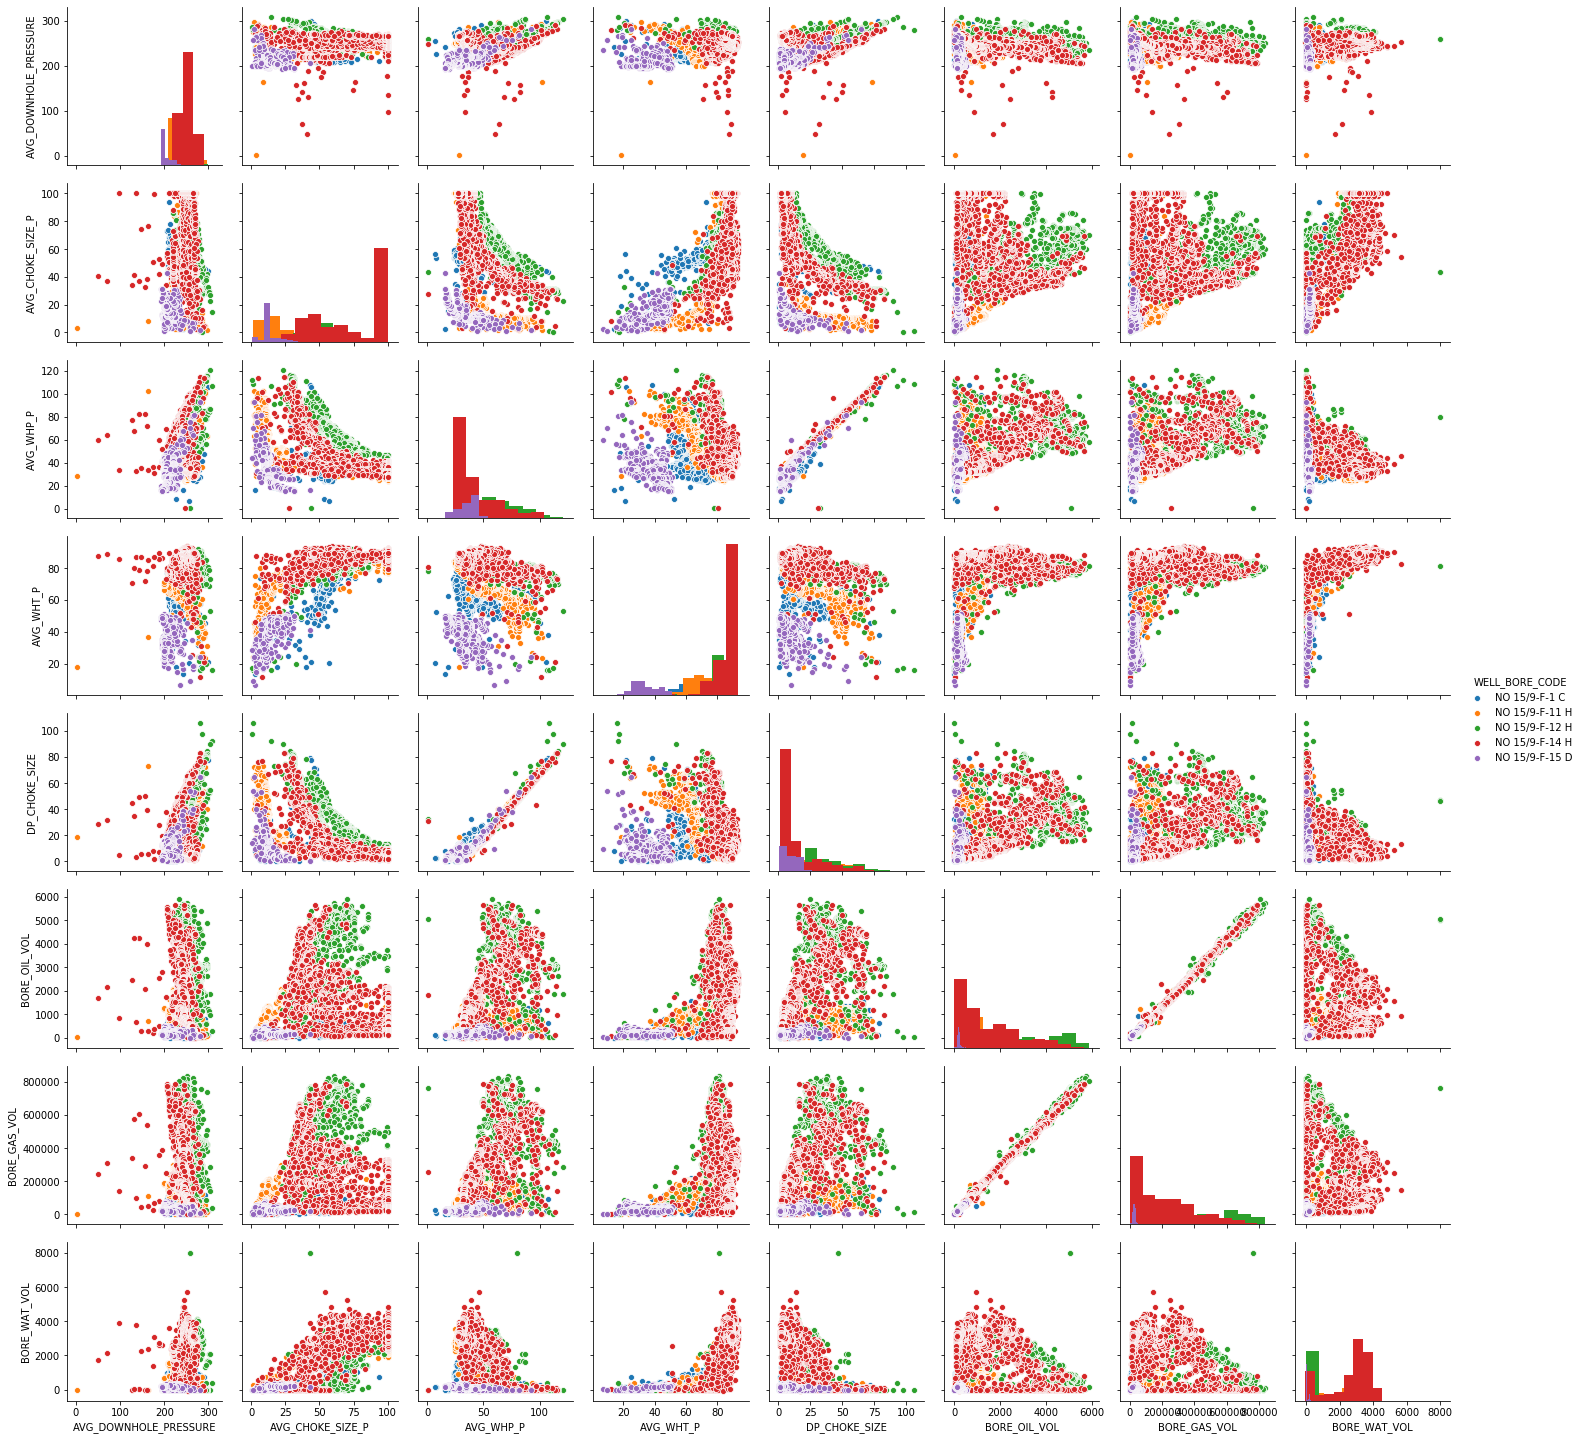

In [46]:
#make pairplots
import seaborn as sns
sns.pairplot(df, vars = ["AVG_DOWNHOLE_PRESSURE",
                                "AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE",
                                "BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"],diag_kind="hist", hue="WELL_BORE_CODE")

In [47]:
df["WELL_TYPE"].value_counts()

OP    5937
Name: WELL_TYPE, dtype: int64

In [48]:
df=df.loc[df["WELL_TYPE"]=='OP']

In [49]:
df["FLOW_KIND"].value_counts()

production    5937
Name: FLOW_KIND, dtype: int64

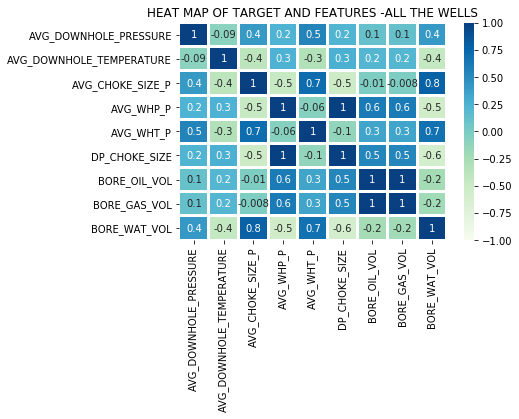

In [50]:
sns.heatmap(df.iloc[:,1:10].corr(), annot=True,fmt = '.1g', cmap= 'GnBu',linewidths=2,vmin=-1, vmax=1, center= 0)
plt.title('HEAT MAP OF TARGET AND FEATURES -ALL THE WELLS')   
plt.show() 

DP_CHOKE_SIZE & AVG_WHP_P 

Oil Volume and Water Volume

are perfectly correlated

For the Multi-linear regression model will take only one among the correlated columns

## Multi Linear Regression

In [51]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(all_wells_df[["WELL_BORE_CODE","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_WAT_VOL"]])
print(X.shape)
y= all_wells_df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y.shape

(5943, 10)


(5943, 1)

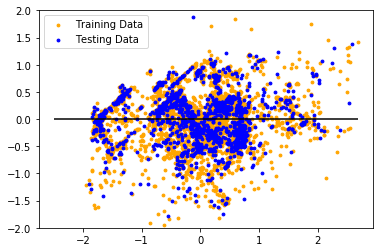

Mean Squared Error (MSE) Train Data: 0.32992305420627854
R-squared (R2) Train Data: 0.6700769457937216
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.33254193174821073
R-squared (R2) Test Data: 0.6618906722691735


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  Well name is taken as dummy variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()

from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
model.fit(X_train_scaled, y_train_scaled)

# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_scaled)
predictions1 = model.predict(X_test_scaled)

# Plot Residuals
plt.scatter(predictions, predictions - y_train_scaled, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1, predictions1 - y_test_scaled, c= "blue",label="Testing Data",s=8)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.show()

# Model Scores

from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with mse and r2
mse_train = mean_squared_error(y_train_scaled, predictions)
r2_train = r2_score(y_train_scaled, predictions)

mse_test = mean_squared_error(y_test_scaled, predictions1)
r2_test = r2_score(y_test_scaled, predictions1)

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")

## Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(all_wells_df[["WELL_BORE_CODE","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_WAT_VOL"]])
print(X.shape)
y= all_wells_df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y.shape

(5943, 10)


(5943, 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [55]:

rf = RandomForestRegressor(max_depth=5)
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)
predictions = rf.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = rf.score(X_test_scaled, y_test_scaled)

print (MSE)
print (r2)

C:\Users\sruth\Anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.25922102323373175
0.7364391147952558


## Lasso Regression

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 15 to 8927
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5937 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5937 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5937 non-null   float64
 3   AVG_CHOKE_SIZE_P          5937 non-null   float64
 4   AVG_WHP_P                 5937 non-null   float64
 5   AVG_WHT_P                 5937 non-null   float64
 6   DP_CHOKE_SIZE             5937 non-null   float64
 7   BORE_OIL_VOL              5937 non-null   float64
 8   BORE_GAS_VOL              5937 non-null   float64
 9   BORE_WAT_VOL              5937 non-null   float64
 10  FLOW_KIND                 5937 non-null   object 
 11  WELL_TYPE                 5937 non-null   object 
dtypes: float64(9), object(3)
memory usage: 603.0+ KB


In [57]:
X2 = pd.get_dummies(df[["WELL_BORE_CODE","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]])
print(X.shape)
y2= df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y2.shape

(5943, 10)


(5937, 1)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42)


In [59]:
from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.365461728570343, R2: 0.664280239339706
